In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# download datasets from repository
!wget https://github.com/Raihan2503/capstone-ml/raw/main/kain-tapis-datasets.zip

--2023-12-22 03:27:51--  https://github.com/Raihan2503/capstone-ml/raw/main/kain-tapis-datasets.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Raihan2503/capstone-ml/main/kain-tapis-datasets.zip [following]
--2023-12-22 03:27:52--  https://raw.githubusercontent.com/Raihan2503/capstone-ml/main/kain-tapis-datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86593252 (83M) [application/zip]
Saving to: ‘kain-tapis-datasets.zip’

kain-tapis-datasets 100%[===================>]  82.58M   140MB/s    in 0.6s    

2023-12-22 03:27:53 (140 MB/s) - ‘kain-tapis-datasets.zip’ saved [86593252/8659

In [3]:
class customCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
      print("\nTraining has stoped!")
      self.model.stop_training = True

In [4]:
import zipfile
local_zip = 'kain-tapis-datasets.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
train_dir = './kain-tapis-datasets/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    class_mode='categorical',
    subset='validation'
)

Found 1116 images belonging to 7 classes.
Found 473 images belonging to 7 classes.


In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

model.summary()
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [7]:
callback = customCallback()
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10,
    callbacks=[callback],
    verbose=1
)

Epoch 1/20
10/10 [==============================] - 64s 6s/step - loss: 5.3810 - accuracy: 0.2031 - val_loss: 1.8882 - val_accuracy: 0.1906
Epoch 2/20
10/10 [==============================] - 59s 6s/step - loss: 1.7355 - accuracy: 0.3031 - val_loss: 1.3662 - val_accuracy: 0.6062
Epoch 3/20
10/10 [==============================] - 59s 6s/step - loss: 1.4779 - accuracy: 0.5095 - val_loss: 1.1411 - val_accuracy: 0.6031
Epoch 4/20
10/10 [==============================] - 58s 6s/step - loss: 1.2235 - accuracy: 0.5531 - val_loss: 1.1491 - val_accuracy: 0.5625
Epoch 5/20
10/10 [==============================] - 59s 6s/step - loss: 0.9920 - accuracy: 0.6687 - val_loss: 0.8595 - val_accuracy: 0.7312
Epoch 6/20
10/10 [==============================] - 58s 6s/step - loss: 1.0254 - accuracy: 0.6551 - val_loss: 0.8453 - val_accuracy: 0.6750
Epoch 7/20
10/10 [==============================] - 59s 6s/step - loss: 0.7748 - accuracy: 0.7469 - val_loss: 0.5672 - val_accuracy: 0.8406
Epoch 8/20
10/10 [==

# Testing Model

Saving pucuk rebung-31-min.jpg to pucuk rebung-31-min.jpg
1/1 [==============================] - 0s 263ms/step
pucuk rebung-31-min.jpg
pucuk rebung


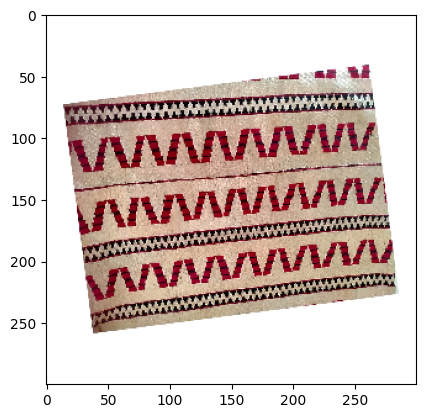

In [8]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if (classes[0][0] == 1) :
    print("antik")
  elif (classes[0][1] == 1) :
    print("jung sarat")
  elif (classes[0][2] == 1) :
    print("lasem")
  elif (classes[0][3] == 1) :
    print("Lauk handak")
  elif (classes[0][4] == 1) :
    print("lima sekebar")
  elif (classes[0][5] == 1) :
    print("mata kibau")
  elif (classes[0][6] == 1) :
    print("pucuk rebung")

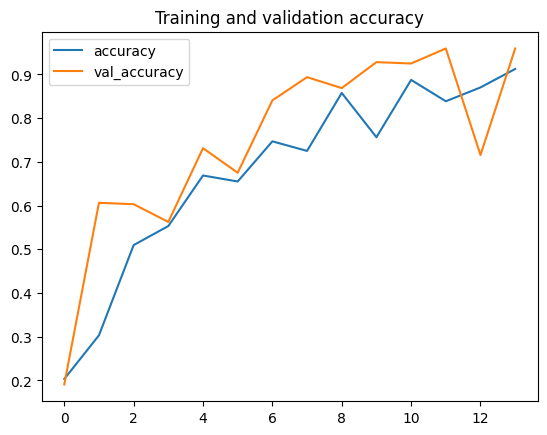

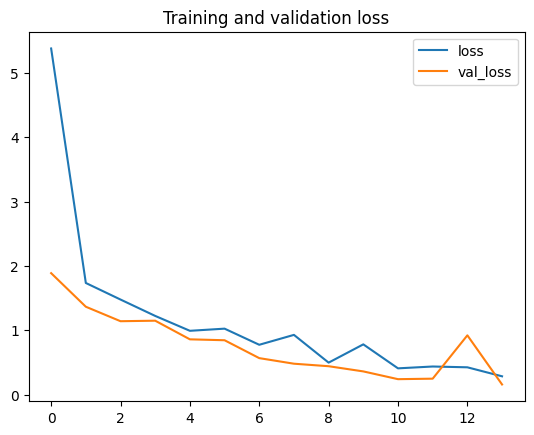

In [9]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='accuracy')
plt.plot  ( epochs, val_acc, label='val_accuracy')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='loss')
plt.plot  ( epochs, val_loss, label='val_loss')
plt.title ('Training and validation loss'   )
plt.legend()

# Save Model

In [10]:
model.save('model_deploy.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
keras_model = tf.keras.models.load_model('model_deploy.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

tflite_model_path = 'model/save/model.tflite'
tf.io.write_file(tflite_model_path, tflite_model)